In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/data.csv', names=['sex', 'length [mm]', 'diameter [mm]', 'height [mm]', 'whole_weight [g]', 'shucked_weight [g]', 'viscera_weight [g]', 'shell_weight [g]', 'rings'])

In [3]:
m_counter = data['sex'].value_counts()['M']
i_counter = data['sex'].value_counts()['I']
f_counter = data['sex'].value_counts()['F']
all_counter = m_counter + f_counter + i_counter
m_percent = round(m_counter / all_counter * 100, 2)
i_percent = round(i_counter / all_counter * 100, 2)
f_percent = round(f_counter / all_counter * 100, 2)

df_qualitative = pd.DataFrame({
  '': ['Male', 'Infant', 'Female'],
  'count': [m_counter, i_counter, f_counter],
  '%': [m_percent, i_percent, f_percent]
})

df_qualitative = df_qualitative.set_index('', drop='False')
display(df_qualitative)    

,count,%
,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [4]:
quantitative_data = {
    '': ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
    'mean': [],
    'std': [],
    'min': [],
    '25%': [],
    '50%': [],
    '75%': [],
    'max': []
}

for column in data.columns[1:]:
    quantitative_data['mean'].append(data[column].mean())
    quantitative_data['std'].append(data[column].std())
    quantitative_data['min'].append(data[column].min())
    quantitative_data['25%'].append(data[column].quantile(0.25))
    quantitative_data['50%'].append(data[column].quantile(0.50))
    quantitative_data['75%'].append(data[column].quantile(0.75))
    quantitative_data['max'].append(data[column].max())

df_quantitative = pd.DataFrame(quantitative_data)

df_quantitative = df_quantitative.set_index('', drop='False')
display(df_quantitative)

,mean,std,min,25%,50%,75%,max
,,,,,,,
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<BarContainer object of 3 artists>

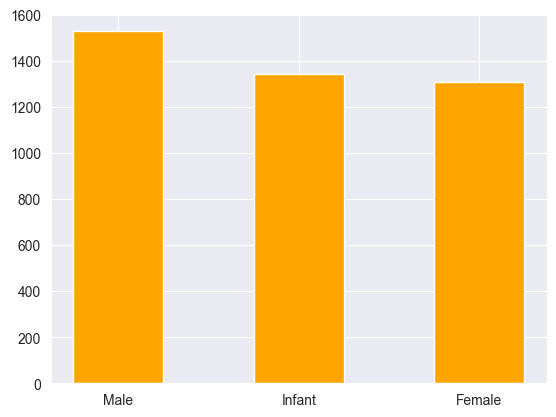

In [5]:
x_qualitative = ['Male', 'Infant', 'Female']
y_qualitative = [m_counter, i_counter, f_counter]

plt.bar(x_qualitative, y_qualitative, color = 'orange', width = 0.5)

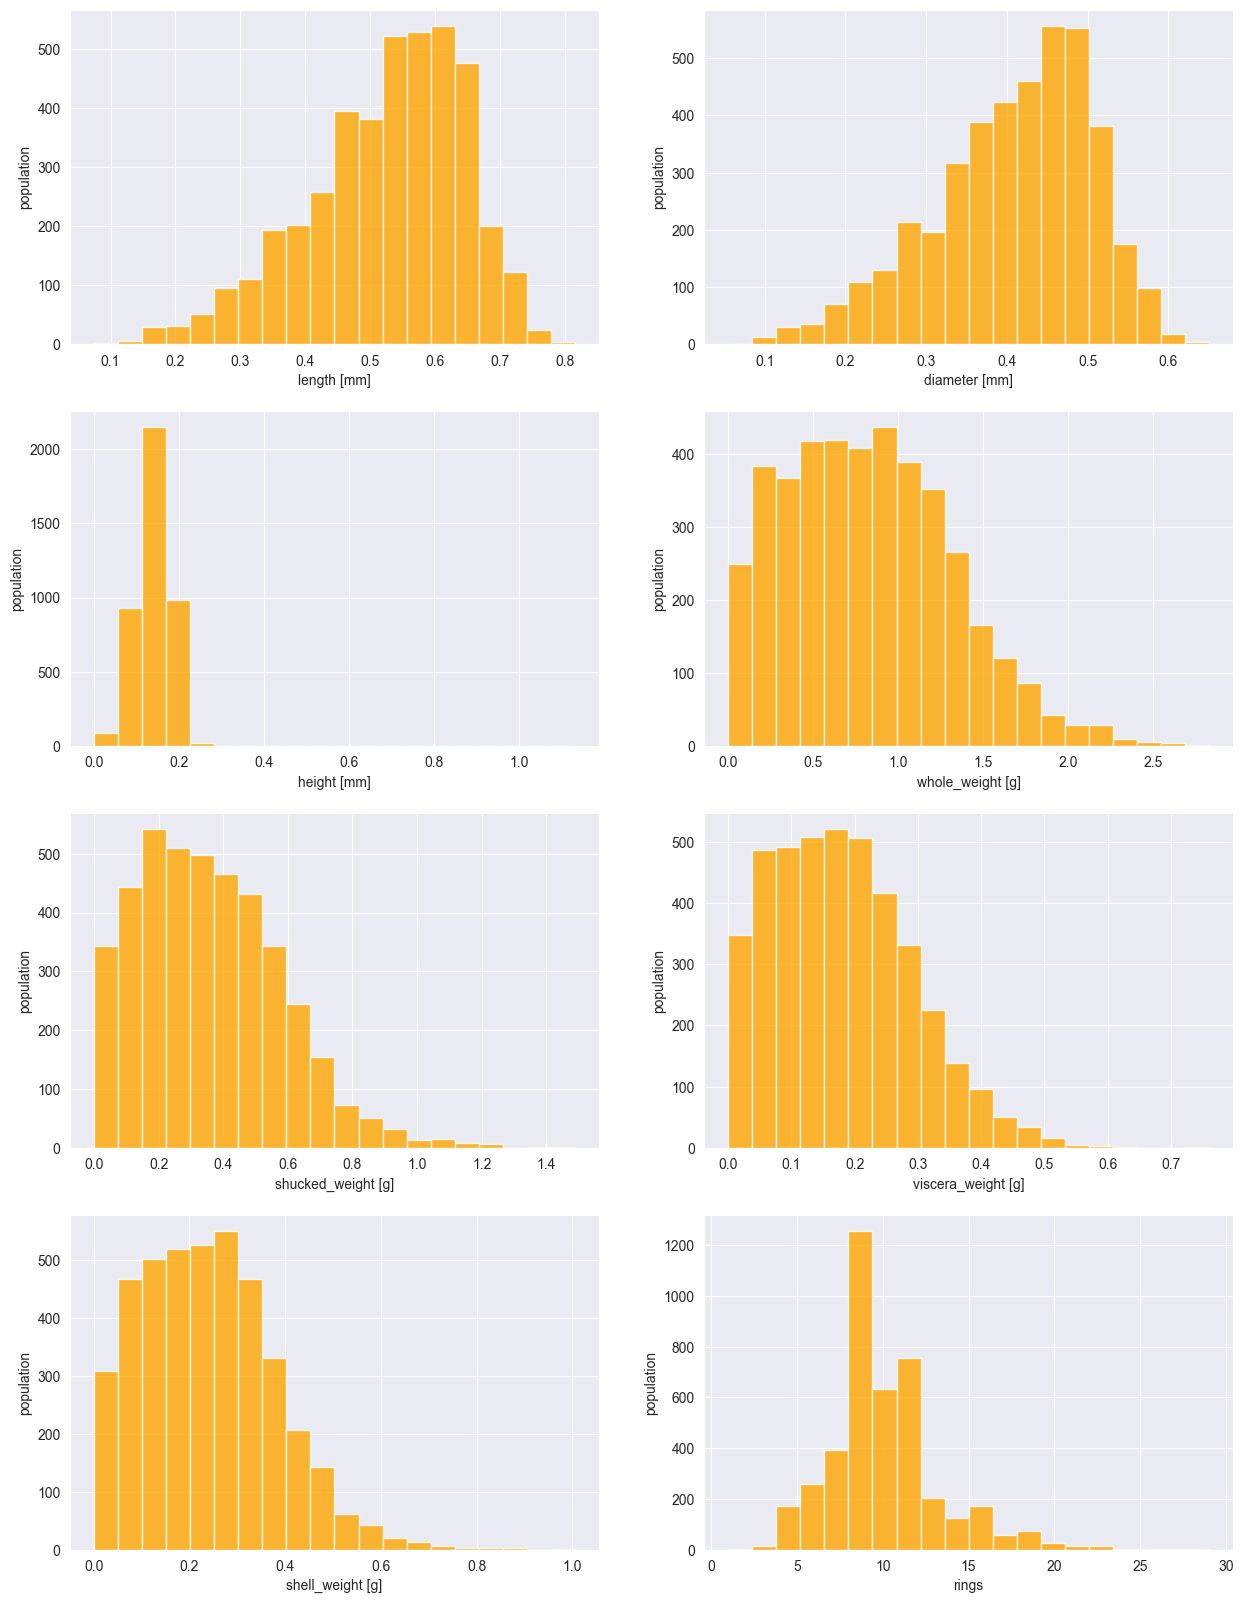

In [6]:
columns_names = ['length [mm]', 'diameter [mm]', 'height [mm]', 'whole_weight [g]', 'shucked_weight [g]', 'viscera_weight [g]', 'shell_weight [g]', 'rings']

plt.figure(figsize=(15, 20))

for column in columns_names:
    plt.subplot(4, 2, columns_names.index(column) + 1)
    plt.hist(data[column], bins=20, alpha=0.8, color='orange')
    plt.xlabel(column)  
    plt.ylabel("population")